Hunter Bennett | Glass Lab | Kupffer Strains Project | 14 March 2023  

Notebook for MA plot analysis of F1 hybrid RNA-seq data

### Import packages, set plotting parameters

In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

Set working directory

In [2]:
workingDirectory = '/home/h1bennet/strains_github/results/Figure4/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

In [3]:
#### PLOTTING PARAMETERS FOR MANUSCRIPT ####
# # get matplotlib to save readable fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['savefig.dpi'] = 500


# line widths
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1

# adjust defualt color for plots to black
# normal default is a dark gray
COLOR = 'black'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR
matplotlib.rcParams['axes.edgecolor'] = COLOR

#### PLOT PARAMETERS FOR THIS PLOT ####

Download deseq2 output files for figure 4

In [4]:
# replace with zenodo link
files = ['https://zenodo.org/record/7829622/files/balbcj_control.vs.c57bl6j_control.deseq.txt',
         'https://zenodo.org/record/7829622/files/balbcj_NSG.vs.c57bl6j_NSG.deseq.txt',
         'https://zenodo.org/record/7829622/files/balbcj_variants.vs.c57bl6j_variants.deseq.txt',
         'https://zenodo.org/record/7829622/files/balbcj_f1nsg_variants.vs.c57bl6j_f1nsg_variants.deseq.txt',
         'https://zenodo.org/record/7829622/files/c57bl6j_control.vs.balbcj_control.deseq.txt',
         'https://zenodo.org/record/7829622/files/c57bl6j_NSG.vs.balbcj_NSG.deseq.txt',
         'https://zenodo.org/record/7829622/files/c57bl6j_variants.vs.balbcj_variants.deseq.txt',
         'https://zenodo.org/record/7829622/files/c57bl6j_f1nsg_variants.vs.balbcj_f1nsg_variants.deseq.txt']

for f in files:
    df = pd.read_csv(f, sep='\t', index_col=0)
    df.to_csv('./'+f.split('/')[-1], sep='\t')

Read in differential expression files for each analysis

In [5]:
# set cutoffs for differential genes
log2fc = 1
pval = 0.05
gene_list_dict ={}

Create dictionary of differential genes

In [6]:
comps = np.concatenate(
    [np.sort(glob.glob('./*variants*variants*deseq.txt')),
     np.sort(glob.glob('./*NSG*NSG*deseq.txt'))])

In [7]:
comps

array(['./balbcj_f1nsg_variants.vs.c57bl6j_f1nsg_variants.deseq.txt',
       './balbcj_variants.vs.c57bl6j_variants.deseq.txt',
       './c57bl6j_f1nsg_variants.vs.balbcj_f1nsg_variants.deseq.txt',
       './c57bl6j_variants.vs.balbcj_variants.deseq.txt',
       './balbcj_NSG.vs.c57bl6j_NSG.deseq.txt',
       './c57bl6j_NSG.vs.balbcj_NSG.deseq.txt'], dtype='<U59')

In [8]:
for i in np.sort(comps):
    print(i)
    # read in gene expression data
    df = pd.read_csv(i,
                     sep='\t',
                     index_col=0)
    sig_genes = df.index[(df['padj'] < pval) & (df['log2FoldChange'] >= log2fc)].to_list()
    gene_list_dict[i.split('.')[3]+'_up'] = list(sig_genes)
    
    # save

./balbcj_NSG.vs.c57bl6j_NSG.deseq.txt
./balbcj_f1nsg_variants.vs.c57bl6j_f1nsg_variants.deseq.txt
./balbcj_variants.vs.c57bl6j_variants.deseq.txt
./c57bl6j_NSG.vs.balbcj_NSG.deseq.txt
./c57bl6j_f1nsg_variants.vs.balbcj_f1nsg_variants.deseq.txt
./c57bl6j_variants.vs.balbcj_variants.deseq.txt


# Plot all at once...

Text(0.5,1,'F1')

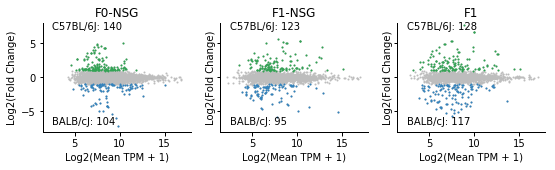

In [9]:
#### NSG ####
df = pd.read_csv('./balbcj_NSG.vs.c57bl6j_NSG.deseq.txt',
                 sep='\t', index_col=0)

fig, axs = plt.subplots(1, 3, figsize=(9,2),sharey=True, sharex=True)
# make general plot of data
axs[0].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, rasterized=True, c='#bdbdbd', zorder=0)
# plot differential genes in each direction...
axs[0].scatter(np.log2(df.loc[gene_list_dict['c57bl6j_NSG_up'], 'baseMean']+1),
               df.loc[gene_list_dict['c57bl6j_NSG_up'], 'log2FoldChange'],
               s=1, rasterized=True, c='#31a354', zorder=1)

axs[0].scatter(np.log2(df.loc[gene_list_dict['balbcj_NSG_up'], 'baseMean']+1),
               df.loc[gene_list_dict['balbcj_NSG_up'], 'log2FoldChange'],
               s=1, rasterized=True, c='#3182bd',zorder=1)
# change plot parameters a bit
axs[0].set_ylim([-8, 8])
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].text(2.5, 7, 'C57BL/6J: %i' % len(gene_list_dict['c57bl6j_NSG_up']))
axs[0].text(2.5, -7, 'BALB/cJ: %i' % len(gene_list_dict['balbcj_NSG_up']))
axs[0].set_xlabel('Log2(Mean TPM + 1)')
axs[0].set_ylabel('Log2(Fold Change)')
axs[0].set_title('F0-NSG')


#### F1-NSG ####
df = pd.read_csv('./balbcj_f1nsg_variants.vs.c57bl6j_f1nsg_variants.deseq.txt',
                 sep='\t', index_col=0)

# make general plot of data
axs[1].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, rasterized=True, c='#bdbdbd', zorder=0)
# plot differential genes in each direction...
axs[1].scatter(np.log2(df.loc[gene_list_dict['c57bl6j_f1nsg_variants_up'], 'baseMean']+1),
               df.loc[gene_list_dict['c57bl6j_f1nsg_variants_up'], 'log2FoldChange'],
               s=1, rasterized=True, c='#31a354', zorder=1)

axs[1].scatter(np.log2(df.loc[gene_list_dict['balbcj_f1nsg_variants_up'], 'baseMean']+1),
               df.loc[gene_list_dict['balbcj_f1nsg_variants_up'], 'log2FoldChange'],
               s=1, rasterized=True, c='#3182bd',zorder=1)
# change plot parameters a bit

axs[1].set_ylim([-8, 8])
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].text(2.5, 7, 'C57BL/6J: %i' % len(gene_list_dict['c57bl6j_f1nsg_variants_up']))
axs[1].text(2.5, -7, 'BALB/cJ: %i' % len(gene_list_dict['balbcj_f1nsg_variants_up']))
axs[1].set_xlabel('Log2(Mean TPM + 1)')
axs[1].set_ylabel('Log2(Fold Change)')
axs[1].set_title('F1-NSG')


#### F1 ####
df = pd.read_csv('./balbcj_variants.vs.c57bl6j_variants.deseq.txt',
                 sep='\t', index_col=0)

# make general plot of data
axs[2].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, rasterized=True, c='#bdbdbd', zorder=0)
# plot differential genes in each direction...
axs[2].scatter(np.log2(df.loc[gene_list_dict['c57bl6j_variants_up'], 'baseMean']+1),
               df.loc[gene_list_dict['c57bl6j_variants_up'], 'log2FoldChange'],
               s=1, rasterized=True, c='#31a354', zorder=1)

axs[2].scatter(np.log2(df.loc[gene_list_dict['balbcj_variants_up'], 'baseMean']+1),
               df.loc[gene_list_dict['balbcj_variants_up'], 'log2FoldChange'],
               s=1, rasterized=True, c='#3182bd',zorder=1)
# change plot parameters a bit

axs[2].set_ylim([-8, 8])
axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].text(2.5, 7, 'C57BL/6J: %i' % len(gene_list_dict['c57bl6j_variants_up']))
axs[2].text(2.5, -7, 'BALB/cJ: %i' % len(gene_list_dict['balbcj_variants_up']))
axs[2].set_xlabel('Log2(Mean TPM + 1)')
axs[2].set_ylabel('Log2(Fold Change)')
axs[2].set_title('F1')

### MA plots with particular genes annotated

In [10]:
genes_long = ['Fos', 'Fosb', 'Fosl1', 'Fosl2', 'Jun', 'Junb', 'Jund',
       'Atf1', 'Atf2', 'Atf3', 'Atf4', 'Batf', 'Batf3', 'Maf', 'Mafb',
       'Mitf', 'Tfe3', 'Tfeb', 'Tfec',
       'Nfkb1','Nfkb2','Rel','Rela', 'Relb', 
       'Runx1', 'Runx2', 'Runx3',
       'Irf1', 'Irf2', 'Irf3', 'Irf4', 'Irf5', 'Irf6', 'Irf7', 'Irf8', 'Irf9',
       'Nr1h2', 'Nr1h3'
]

Text(0.5,1,'F1')

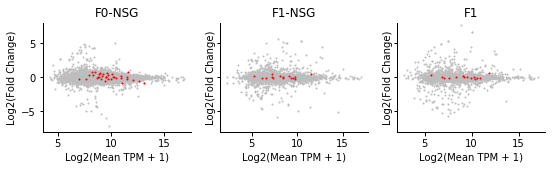

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(9,2),sharey=True)
#### F0-NSG ####
df = pd.read_csv('./balbcj_NSG.vs.c57bl6j_NSG.deseq.txt',
                 sep='\t', index_col=0)

df_target_genes = df.reindex(genes_long).dropna()

# make general plot of data
axs[0].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, c='#bdbdbd', zorder=0,
               rasterized=True)


# plot TFs of interest
# red dot
axs[0].scatter(np.log2(df_target_genes.baseMean+1),
               df_target_genes.log2FoldChange,
               s=1, c='red', zorder=0,
               rasterized=True)

# change plot parameters a bit
axs[0].set_ylim([-8, 8])
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].set_xlabel('Log2(Mean TPM + 1)')
axs[0].set_ylabel('Log2(Fold Change)')
axs[0].set_title('F0-NSG')


#### F1-NSG ####
df = pd.read_csv('./balbcj_f1nsg_variants.vs.c57bl6j_f1nsg_variants.deseq.txt',
                 sep='\t', index_col=0)

df_target_genes = df.reindex(genes_long).dropna()

# make general plot of data
axs[1].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, c='#bdbdbd', zorder=0,
               rasterized=True)

# plot TFs of interest
# red dot
axs[1].scatter(np.log2(df_target_genes.baseMean+1),
               df_target_genes.log2FoldChange,
               s=1, c='red', zorder=0,
               rasterized=True)

# change plot parameters a bit
axs[1].set_ylim([-8, 8])
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].set_xlabel('Log2(Mean TPM + 1)')
axs[1].set_ylabel('Log2(Fold Change)')
axs[1].set_title('F1-NSG')

#### F1 ####
df = pd.read_csv('./balbcj_variants.vs.c57bl6j_variants.deseq.txt',
                 sep='\t', index_col=0)

df_target_genes = df.reindex(genes_long).dropna()

# make general plot of data
axs[2].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, c='#bdbdbd', zorder=0,
               rasterized=True)

# plot TFs of interest
# red dot
axs[2].scatter(np.log2(df_target_genes.baseMean+1),
               df_target_genes.log2FoldChange,
               s=1, c='red', zorder=0,
               rasterized=True)

# change plot parameters a bit
axs[2].set_ylim([-8, 8])
axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].set_xlabel('Log2(Mean TPM + 1)')
axs[2].set_ylabel('Log2(Fold Change)')
axs[2].set_title('F1')


Text(0.5,1,'F1')

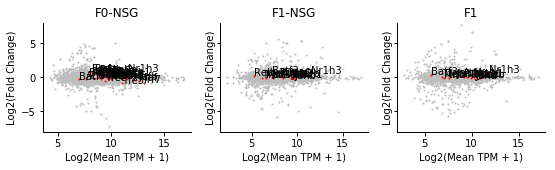

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(9,2),sharey=True)

#### NSG ####

df = pd.read_csv('./balbcj_NSG.vs.c57bl6j_NSG.deseq.txt',
                 sep='\t', index_col=0)

df_target_genes = df.reindex(genes_long).dropna()

# make general plot of data
axs[0].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, c='#bdbdbd', zorder=0,
               rasterized=True)


# plot TFs of interest
# red dot
axs[0].scatter(np.log2(df_target_genes.baseMean+1),
               df_target_genes.log2FoldChange,
               s=1, c='red', zorder=0,
               rasterized=True)

# label
for i, row in df_target_genes.iterrows():
    axs[0].text(np.log2(row.baseMean+1),
                   row.log2FoldChange,
                   i)
    
# change plot parameters a bit
axs[0].set_ylim([-1, 1])
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].set_xlabel('Log2(Mean TPM + 1)')
axs[0].set_ylabel('Log2(Fold Change)')
axs[0].set_title('F0-NSG')


#### F1-NSG ####
df = pd.read_csv('./balbcj_f1nsg_variants.vs.c57bl6j_f1nsg_variants.deseq.txt',
                 sep='\t', index_col=0)

df_target_genes = df.reindex(genes_long).dropna()

# make general plot of data
axs[1].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, c='#bdbdbd', zorder=0,
               rasterized=True)

# plot TFs of interest
# red dot
axs[1].scatter(np.log2(df_target_genes.baseMean+1),
               df_target_genes.log2FoldChange,
               s=1, c='red', zorder=0,
               rasterized=True)

# label
for i, row in df_target_genes.iterrows():
    axs[1].text(np.log2(row.baseMean+1),
                   row.log2FoldChange,
                   i)

# change plot parameters a bit
axs[1].set_ylim([-8, 8])
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].set_xlabel('Log2(Mean TPM + 1)')
axs[1].set_ylabel('Log2(Fold Change)')
axs[1].set_title('F1-NSG')


#### F1 ####
df = pd.read_csv('./balbcj_variants.vs.c57bl6j_variants.deseq.txt',
                 sep='\t', index_col=0)

df_target_genes = df.reindex(genes_long).dropna()

# make general plot of data
axs[2].scatter(np.log2(df.baseMean+1),
               df.log2FoldChange,
               s=1, c='#bdbdbd', zorder=0,
               rasterized=True)

# plot TFs of interest
# red dot
axs[2].scatter(np.log2(df_target_genes.baseMean+1),
               df_target_genes.log2FoldChange,
               s=1, c='red', zorder=0,
               rasterized=True)

# label
for i, row in df_target_genes.iterrows():
    axs[2].text(np.log2(row.baseMean+1),
                   row.log2FoldChange,
                   i)

# change plot parameters a bit
axs[2].set_ylim([-8, 8])
axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].set_xlabel('Log2(Mean TPM + 1)')
axs[2].set_ylabel('Log2(Fold Change)')
axs[2].set_title('F1')